
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E0-MLP.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for regression and classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. MLP for regression (*)

We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

&nbsp; a) Load the mpg dataset using seaborn. (*)

&nbsp; b) Use your data analysis skills to perform EDA. (*)

&nbsp; c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

&nbsp; d) Can you figure out a way to see if the values filled in are reasonable? (**)

&nbsp; e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

&nbsp; g) Now use early stopping to tune the number of epochs. (*)

&nbsp; h) Train on all training data and validation data. (*)

&nbsp; i) Predict on test data and evaluate. (*)

&nbsp; j) Can you create an MLP model that beats random forest for this dataset? (**)

<details>

<summary>Hint</summary>

d) Perhaps some statistical analysis and visual comparison of similar samples? Also combine with domain skills. 

f) Decide how to do systematic testing and document them.

j) Don't forget about classical machine learning models that we learned in the last course, in many cases they can outperform neural networks. You need to pick the right model for the right problem.

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

## 1. MLP for classification (**)

Use the heart dataset that you worked with in the lab in Machine learning course and train an MLP on it. Gather your knowledge of MLP from the lecture and from the previous exercise to try and see if you can outperform your previous model. Note that an important part is to perform systematic scientific experimentation. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---

&nbsp; a) Load the mpg dataset using seaborn. (*)

In [176]:
# load the mpg data set from seaborn
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


&nbsp; b) Use your data analysis skills to perform EDA. (*)

In [177]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [178]:
mpg.info() # missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


&nbsp; c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

---------------------------------------------------------------------------------------------------------------------------

In [179]:
# from sklearn.impute import KNNImputer

# # KNN Imputation
# imputer = KNNImputer(n_neighbors=5)
# mpg[['horsepower']] = imputer.fit_transform(mpg[['horsepower']])


---------------------------------------------------------------------------------------------------------------------------

In [180]:
mpg.info() # missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [181]:
mpg.isnull().sum() # missing values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [182]:
# a list of indices of rows with missing data
index = mpg[mpg.isnull().any(axis=1)].index.tolist()
index

[32, 126, 330, 336, 354, 374]

In [183]:
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
# mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mode()[0]) # typvärde

mpg = mpg.dropna()

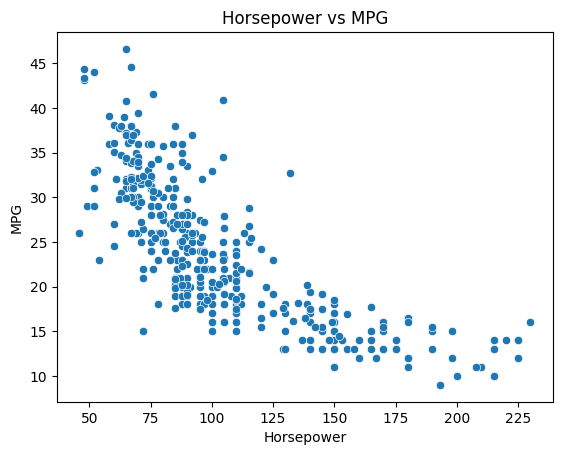

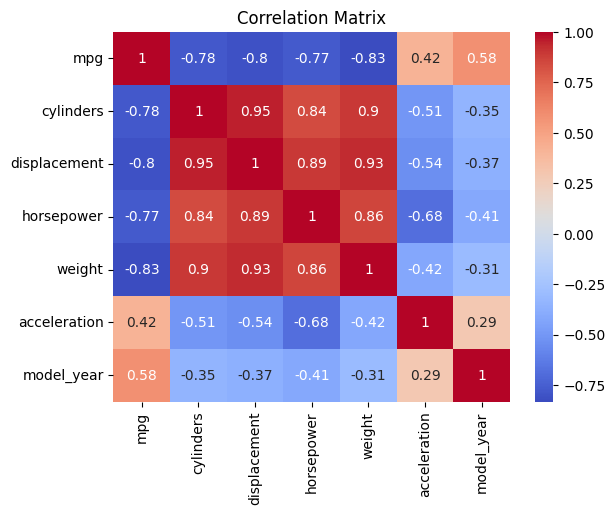

In [184]:
# Scatterplot mellan hästkrafter och bränsleekonomi
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

# Korrelationsmatris
# Select only numeric columns for correlation matrix
numeric_cols = mpg.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


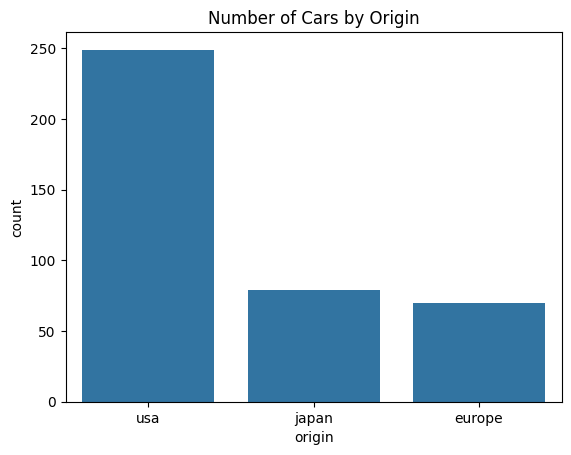

In [185]:
# Antal bilar per ursprung
sns.countplot(x='origin', data=mpg)
plt.title('Number of Cars by Origin')
plt.show()


&nbsp; d) Can you figure out a way to see if the values filled in are reasonable? (**)


In [186]:
nans = mpg.loc[index]
nans

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,104.469388,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,104.469388,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,104.469388,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,104.469388,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,104.469388,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,104.469388,3035,20.5,82,usa,amc concord dl


In [187]:
from sklearn.impute import KNNImputer

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
mpg[['horsepower']] = imputer.fit_transform(mpg[['horsepower']])

In [188]:
mpg.loc[index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,104.469388,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,104.469388,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,104.469388,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,104.469388,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,104.469388,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,104.469388,3035,20.5,82,usa,amc concord dl


In [189]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


&nbsp; e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)


In [190]:
mpg = mpg.drop(columns=['origin', 'name'])

In [191]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = mpg.drop(columns=['mpg'])  # Features (excluding the target variable)
y = mpg['mpg']                # Target (miles per gallon)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the sizes
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))


Train set size: 278
Test set size: 120


In [192]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Fit scalers on training data and transform
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

In [ ]:
import keras
from keras import layers

model = keras.models.Sequential([
    layers.Dense(256, activation='relu'), 
    layers.Dense(128, activation='relu'),  
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')  # Output layer
])

In [197]:
mpg['mpg'].nunique()

129

In [199]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_standard, y_train, epochs=10, batch_size=32)    



Epoch 1/10


c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\Ars\AppData\Local\Temp\ipykernel_4464\457233923.py", line 7, in <module>

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 325, in fit

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 118, in one_step_on_iterator

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 106, in one_step_on_data

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\trainer.py", line 322, in compute_loss

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\compile_utils.py", line 605, in __call__

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\compile_utils.py", line 641, in call

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\loss.py", line 42, in __call__

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py", line 1714, in sparse_categorical_crossentropy

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py", line 1554, in sparse_categorical_crossentropy

  File "c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 633, in sparse_categorical_crossentropy

Received a label value of 43 which is outside the valid range of [0, 1).  Label values: 16 27 27 23 17 28 14 43 32 30 20 14 32 20 17 30 15 14 28 30 39 15 26 15 21 20 34 30 26 18 23 31
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3784]